In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv("/content/height-weight.csv")
df=pd.DataFrame(df)
df.head()

,Height,Weight
0,1.47,52.21
1,1.50,53.12
2,1.52,54.48
3,1.55,55.84
4,1.57,57.20


In [ ]:
df.columns=df.columns.str.lower()

In [ ]:
df.head()

,height,weight
0,1.47,52.21
1,1.50,53.12
2,1.52,54.48
3,1.55,55.84
4,1.57,57.20


In [ ]:
df.isnull().sum()

height    0
weight    0
dtype: int64

In [ ]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   height  15 non-null     float64
 1   weight  15 non-null     float64
dtypes: float64(2)
memory usage: 368.0 bytes


In [ ]:
from sklearn.model_selection import train_test_split
x=df["weight"]
y=df["height"]

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)
x_train


0     52.21
9     64.47
3     55.84
1     53.12
10    66.28
7     61.29
12    69.92
2     54.48
6     59.93
14    74.46
13    72.19
8     63.11
Name: weight, dtype: float64

In [ ]:
y_train

0     1.47
9     1.70
3     1.55
1     1.50
10    1.73
7     1.65
12    1.78
2     1.52
6     1.63
14    1.83
13    1.80
8     1.68
Name: height, dtype: float64

In [ ]:
x_test

11    68.10
4     57.20
5     58.57
Name: weight, dtype: float64

In [ ]:
y_test

11    1.75
4     1.57
5     1.60
Name: height, dtype: float64

In [ ]:
x_train=x_train.values.reshape(-1,1)
x_test=x_test.values.reshape(-1,1)
from sklearn.linear_model import LinearRegression
lm_model=LinearRegression()
lm_model.fit(x_train,y_train)
y_pred=lm_model.predict(x_test)

In [ ]:
from sklearn.metrics import mean_squared_error as msee,mean_absolute_error as maee,r2_score as r2
def evaluation(act,pred):
  mse=msee(act,pred)
  mae=maee(act,pred)
  rmse=np.sqrt(mse)
  score=r2(act,pred)
  return score,rmse,mse,mae

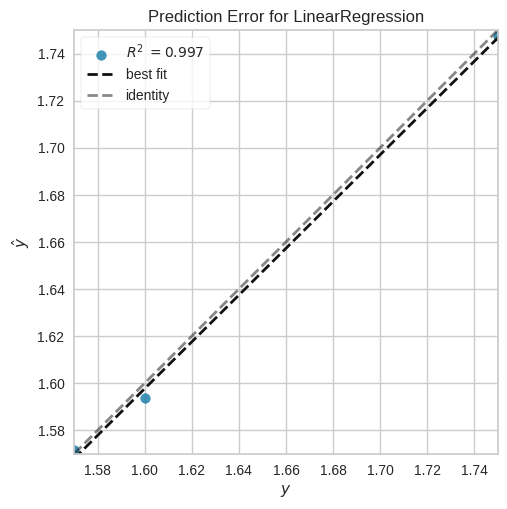

<Axes: title={'center': 'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [ ]:
from yellowbrick.regressor import PredictionError
vis=PredictionError(lm_model)
vis.fit(x_train,y_train)
vis.score(x_test,y_test)
vis.show()

In [ ]:
evaluation(y_test,y_pred)

(0.9972652131056762,
 0.004117727376212211,
 1.6955678744807503e-05,
 0.0035024543528157834)